# Réseau de neurones et attrition des clients bancaires

Réseau de neurones avec Python (Keras)

## La problématique

On s'intéresse ici à une problème classique du domaine bancaire (mais pas que !) qui est l'attrition ou *churn* en anglais et correspond à la perte de client. 
Récemment de nombreux clients ont quitté la banque Crédit Friqué. La question est de comprendre pourquoi ces départs ? Ou plutôt de prédire s'ils vont partir...

## Les données

Pour répondre à cette question, la banque a sélectionné 6 mois plus tôt un sous ensemble de ses clients pour lesquels elle a stocké un certain nombre d’information puis, dans les 6 mois qui ont suivis, elle a observé si les clients avaient quitté ou non la banque. Vous voilà donc, 6 mois plus tard, contacté par la banque qui vous propose un beau dataset (pour une fois!) et vous demande de déterminer les profils des clients les plus à même de partir.
Vous disposez du fichier banque_abandon.csv qui est la base de données de la banque virtuelle Crédit Friqué.

## Quelques questions préliminaires

C'est juste pour vous échauffer donc ça doit être fait en moins d'une heure ça !
1. À quoi correspondent les différentes variables du datasets ?
2. Pour pas perdre les bonnes habitudes, faites quelques visualisations pour voir ce qu'il y a dans vos données.
3. À quelle type de problème avez-vous à faire ici : classification ou régression ?
>- Lister un certain nombre de modèles vous permettant de le résoudre
>- Lister les métriques associées à ce type de problème
>- Choisir un modèle, l'entraîner et l'évaluer avec la métrique de votre choix

In [1]:
# flemme de tout refaire et vous commencez à être au point là dessus normalement
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dataset
df = pd.read_csv('data/banque_abandon.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


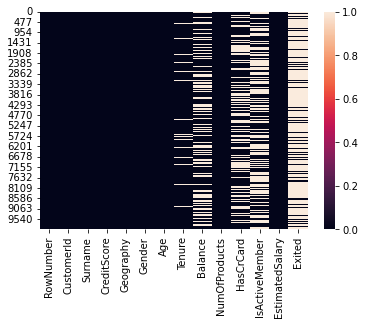

In [5]:
sns.heatmap(df==0);

## Dans le vif du sujet

Vous l'aurez compris, il s'agit ici de résoudre le problème à l'aide d'un réseau de neurones.   
Vous aurez bien sûr besoin du package `keras` et il vous faudra aussi certainement installer `tensorflow`(et peut-être `theano` si besoin).  
À vous de jouer !
N'oubliez pas le preprocessing !

In [6]:
# création des tables X et y
X = df.iloc[:, 3:13] # pour virer row, id et nom
y = df.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
X.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [8]:
# échantillons train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [9]:
# one-hot-encoding sur les variables catégoriques
# feature scaling sur les numériques
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector

preprocessing = make_column_transformer(
    (OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    (StandardScaler(), make_column_selector(dtype_exclude='object')))

X_train_pp =  preprocessing.fit_transform(X_train)
X_test_pp =  preprocessing.transform(X_test)
X_train_pp.shape, X_test_pp.shape

((8000, 11), (2000, 11))

In [10]:
# on passe à l'ANN
from keras.models import Sequential
from keras.layers import Dense

# architecture
mlp = Sequential()
mlp.add(Dense(units=8, activation='relu', input_dim=11))
mlp.add(Dense(units=6, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))

# paramètres d'apprentissage
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entrainement
mlp.fit(X_train_pp, y_train, epochs=100, batch_size=20, validation_data=(X_test_pp, y_test))

2022-01-27 08:49:31.483609: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 08:49:31.510261: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 1999965000 Hz
2022-01-27 08:49:31.511696: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f71bf68bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-27 08:49:31.511756: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Epoch 1/100
400/400 [==============================] - 0s 834us/step - loss: 0.5185 - accuracy: 0.7617 - val_loss: 0.4498 - val_accuracy: 0.7980
Epoch 2/100
400/400 [==============================] - 0s 657us/step - loss: 0.4359 - accuracy: 0.8043 - val_loss: 0.4302 - val_accuracy: 0.8085
Epoch 3/100
400/400 [==============================] - 0s 643us/step - loss: 0.4230 - accuracy: 0.8159 - val_loss: 0.4201 - val_accuracy: 0.8160
Epoch 4/100
400/400 [==============================] - 0s 644us/step - loss: 0.4144 - accuracy: 0.8257 - val_loss: 0.4126 - val_accuracy: 0.8245
Epoch 5/100
400/400 [==============================] - 0s 679us/step - loss: 0.4063 - accuracy: 0.8274 - val_loss: 0.4043 - val_accuracy: 0.8315
Epoch 6/100
400/400 [==============================] - 0s 738us/step - loss: 0.3995 - accuracy: 0.8296 - val_loss: 0.3976 - val_accuracy: 0.8320
Epoch 7/100
400/400 [==============================] - 0s 696us/step - loss: 0.3938 - accuracy: 0.8300 - val_loss: 0.3932 - val_ac

In [11]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


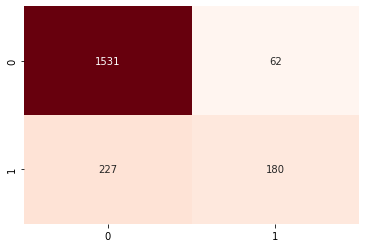

In [12]:
# predictions sur le testset
y_pred = mlp.predict(X_test_pp)
classes_pred = 1 * (y_pred > 0.5)

# matrice de confusion
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, classes_pred),
            annot=True, cbar=False, fmt='d', cmap='Reds');

In [13]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [17]:
print(f'Rappel : {180/(180+227) = }')
print(f'Précision : {180/(180+62) = }')

Rappel : 180/(180+227) = 0.44226044226044225
Précision : 180/(180+62) = 0.743801652892562


## Évaluation du réseau et affinage des hyper-paramètres

Jusqu'à maintenant, on a évalué les réseaux qu'on a vu en regardant uniquement l'accuracy mais cette valeur n'est pas déterministe puisqu'elle dépend de certains paramètres aléatoires comme le train_test_split, l'intialisation des paramètres etc...

Une solution par rapport à ce problème est de répéter l'entraînement plusieurs fois et de regarder les résultats en moyenne. On l'a déjà utilisé et ça s'appelle la validation croisée.

Mettez en place la validation croisée en utilisant `cross_val_score` puis affiner les paramètres avec `GridSearchCV`.

__/!\\__ Vous aurez besoin de ce qu'on appelle un wrapper pour pouvoir relier `keras` à `sklearn` et utiliser un modèle de l'un dans l'autre. Ça tombe bien, ça existe : regarder la librairie `keras.wrappers.scikit_learn`.

In [31]:
# définition d'une fonction pour instancier le modèle
def build_ann_clf(optimizer='adam'):
    clf = Sequential()
    clf.add(Dense(units=8, activation='relu', input_dim=11))
    clf.add(Dense(units=6, activation='relu'))
    clf.add(Dense(units=1, activation='sigmoid'))
    clf.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return clf

In [32]:
# création d'un wrapper pour utiliser le modèle keras dans sklearn
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
clf = KerasClassifier(build_fn=build_ann_clf, batch_size=10, epochs=100)
acc = cross_val_score(estimator=clf, X=X_train_pp, y=y_train, cv=10, n_jobs=-1)
acc

2022-01-27 09:23:54.682204: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 09:23:54.689540: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 09:23:54.693383: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them 

Epoch 1/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4747 - accuracy: 0.8000
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7935
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.5025 - accuracy: 0.7851
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.5266 - accuracy: 0.7453
Epoch 2/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8126
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.8069
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.8018
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.8199
Epoch 3/100
720/720 [==============================] - 1s 1ms/step - loss: 0.4151 - accuracy: 0.8251
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4252 - accurac

KeyboardInterrupt: 

In [25]:
acc.mean(), acc.std()

(0.8599999964237213, 0.008732134188685693)

In [29]:
# affinage des hyperparamètres par validation croisée : GridSearchCV
from sklearn.model_selection import GridSearchCV
clf = KerasClassifier(build_fn=build_ann_clf)

parametres = {
    'batch_size' : [5, 10, 25],
    'epochs': [100, 150],
    'optimizer' : ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=clf, param_grid=parametres, scoring='accuracy', cv=8)
grid = grid.fit(X_train_pp, y_train, verbose=0)
grid.best_params_, grid.best_score_

KeyboardInterrupt: 

## Sauvegarde et chargement des réseaux

Regarder les méthodes `save` et `load_model` de la librairie `keras.models` pour la sauvegarde et le chargement des modèle. Quel format de fichier utiliser ?

Si vous souhaitez ne sauvegarder que l'architecture du modèle (sans les poids ni la configuration d'entraînement), vous pouvez utiliser `to_json`.

Enfin, pour ne sauvegarder que les poids, vous avez la méthode `save_weights`.

In [34]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


### model.save()

Cette fonction sauvegarde : 
- l'architecture du modèle : permet de le recréer si besoin
- les poids du modèle
- les paramètres d'apprentissage (loss, optimizer, metrics de l'étape `compile`)
- l'état de l'optimisation ce qui permet de reprendre l'apprentissage où on l'avait laissé

In [36]:
mlp.save('models/mlp_bank.h5')

### model.load_model()
charge un modèle enregistrés et l'ensemble des infos

In [37]:
from keras.models import load_model
new_model = load_model('models/mlp_bank.h5')

In [38]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [41]:
new_model.get_weights()[1], mlp.get_weights()[1]

(array([-0.40640736,  0.2504217 ,  1.0757139 ,  0.75616646,  1.1995943 ,
         0.80780786, -0.11462856, -0.3914252 ], dtype=float32),
 array([-0.40640736,  0.2504217 ,  1.0757139 ,  0.75616646,  1.1995943 ,
         0.80780786, -0.11462856, -0.3914252 ], dtype=float32))

In [42]:
new_model.optimizer, new_model.loss

(<tensorflow.python.keras.optimizer_v2.adam.Adam at 0x7faf0c75eb20>,
 <function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>)

In [44]:
new_model.predict(X_test_pp)

array([[0.18816015],
       [0.06006962],
       [0.0058144 ],
       ...,
       [0.02872148],
       [0.9914901 ],
       [0.03783619]], dtype=float32)

In [45]:
new_model.fit(X_test_pp, y_test, batch_size=20, epochs=5)

Epoch 1/5
100/100 [==============================] - 0s 597us/step - loss: 0.3414 - accuracy: 0.8545
Epoch 2/5
100/100 [==============================] - 0s 612us/step - loss: 0.3387 - accuracy: 0.8555
Epoch 3/5
100/100 [==============================] - 0s 530us/step - loss: 0.3387 - accuracy: 0.8550
Epoch 4/5
100/100 [==============================] - 0s 585us/step - loss: 0.3367 - accuracy: 0.8605
Epoch 5/5
100/100 [==============================] - 0s 567us/step - loss: 0.3363 - accuracy: 0.8575


### model.to_json()

Si on a juste besoin de sauvegarder **la structure d'un réseau, sans ses paramètres d'apprentissage ni ses poids**, on peut utiliser les 2 fonctions suivantes (pour sauvegarder et charger).

In [46]:
# sauvegarde en json
json = mlp.to_json()
json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 11], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 11], "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 6, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [47]:
# reconstruire un modèle depuis une sauvegarde json
from keras.models import model_from_json
new_model2 = model_from_json(json)
new_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [55]:
new_model2.get_weights()

[array([[-0.2851035 , -0.47825703,  0.26700902, -0.09673935,  0.3867796 ,
          0.2644499 , -0.31293163,  0.39127475],
        [ 0.19264537,  0.22873503,  0.342259  ,  0.5180369 ,  0.18809956,
          0.40081382,  0.5525113 ,  0.0584442 ],
        [ 0.25613844, -0.3675022 ,  0.5002273 , -0.0732854 ,  0.25263083,
         -0.36980718, -0.5465233 ,  0.08018857],
        [-0.4395377 , -0.5209357 , -0.4718772 ,  0.22666454, -0.35063618,
          0.19318998, -0.188882  , -0.21800086],
        [-0.3761191 ,  0.36368138, -0.17171249, -0.47624534,  0.05104798,
          0.03966105, -0.47040206,  0.03478914],
        [ 0.46323568,  0.4932924 ,  0.00163776, -0.07278833,  0.22610664,
          0.02552593,  0.29678547, -0.32815465],
        [-0.00625551, -0.33984882,  0.08233625,  0.07234365,  0.05499756,
         -0.36217773,  0.517443  , -0.3457936 ],
        [-0.42046544, -0.2563634 , -0.23070267, -0.33277187,  0.09513402,
         -0.19241545, -0.2730787 , -0.23855108],
        [-0.4527

In [51]:
print(new_model2.optimizer)

None


### model.save_weights()

Si jamais, on veut uniquement les poids d'un modèle.

In [56]:
mlp.save_weights('models/mes_poids.h5')

In [57]:
new_model3 = Sequential([
    Dense(units=8, activation='relu', input_dim=11),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

new_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [62]:
# poids initialisés par défaut
new_model3.get_weights()

[array([[-7.17370629e-01,  5.07246017e-01, -1.17547013e-01,
         -5.76582789e-01,  2.72090524e-01,  8.54372382e-02,
          5.11946082e-01,  7.85673037e-02],
        [-4.05586660e-01,  5.56773320e-02, -2.26069480e-01,
          5.48489213e-01, -1.66155174e-01, -3.34440405e-03,
          4.98131305e-01, -2.88371116e-01],
        [ 5.00869870e-01, -1.61655108e-03, -2.80214339e-01,
          3.38897496e-01,  1.90462455e-01,  3.07290345e-01,
         -1.20579086e-01,  5.49690351e-02],
        [-6.69761956e-01,  1.84862018e-02, -1.79556474e-01,
          8.84288996e-02, -7.96168693e-04,  4.62862216e-02,
         -3.31855834e-01, -9.21989530e-02],
        [-3.33012104e-01,  1.24566339e-01,  8.83827568e-04,
         -1.38776675e-02, -2.96704262e-01, -5.40259123e-01,
          1.09486556e+00,  1.14615083e+00],
        [-4.67029184e-01,  3.70786004e-02, -7.59298131e-02,
          1.16880007e-01,  8.35068300e-02, -1.80306762e-01,
          1.50968000e-01, -5.23742847e-02],
        [-3.3990

In [61]:
# chargement des poids sauvegardés
new_model3.load_weights('models/mes_poids.h5')
new_model3.get_weights()

[array([[-7.17370629e-01,  5.07246017e-01, -1.17547013e-01,
         -5.76582789e-01,  2.72090524e-01,  8.54372382e-02,
          5.11946082e-01,  7.85673037e-02],
        [-4.05586660e-01,  5.56773320e-02, -2.26069480e-01,
          5.48489213e-01, -1.66155174e-01, -3.34440405e-03,
          4.98131305e-01, -2.88371116e-01],
        [ 5.00869870e-01, -1.61655108e-03, -2.80214339e-01,
          3.38897496e-01,  1.90462455e-01,  3.07290345e-01,
         -1.20579086e-01,  5.49690351e-02],
        [-6.69761956e-01,  1.84862018e-02, -1.79556474e-01,
          8.84288996e-02, -7.96168693e-04,  4.62862216e-02,
         -3.31855834e-01, -9.21989530e-02],
        [-3.33012104e-01,  1.24566339e-01,  8.83827568e-04,
         -1.38776675e-02, -2.96704262e-01, -5.40259123e-01,
          1.09486556e+00,  1.14615083e+00],
        [-4.67029184e-01,  3.70786004e-02, -7.59298131e-02,
          1.16880007e-01,  8.35068300e-02, -1.80306762e-01,
          1.50968000e-01, -5.23742847e-02],
        [-3.3990

## Complément sur l'overfitting

Toujours sur les données de la banque, entrainer un réseau ayant une structure complexe avec beaucoup de neurones et de couches afin de générer une situation d'overfitting.  
Comparer l'accuracy sur les échantillons train et test pour confirmer le cas de sur-apprentissage.

Reprendre le même réseau en utilisant des layers `Dropout` pour réduire ce problème.  
Comparer à nouveau l'accuracy pour voir l'effet des `Dropout` sur l'overfitting.

Une autre méthode pour limiter le sur-apprentissage est la régularisation. Est-il possible d'en faire avec un réseau de neurones ? Si oui, allez-y